#This is project is forecasting of household electricty prediction.


In [0]:
 # importing all lib required 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler

In [0]:
#google colab GPU  driver version cuda version for nvidia
!nvidia-smi

Wed May 13 11:18:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#importing data from drive

df = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt',
                   sep=';',                            # separateur = ;
                   header=0,                           
                   low_memory=False,                   
                   infer_datetime_format=True,        
                   parse_dates={'datetime':[0,1]},     
                   index_col=['datetime'])             
df1 = pd.DataFrame(df)

# data cleaning...

In [0]:
df1.isnull().sum()  #null entries in dataset



Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [0]:
df1.info()
df1.describe()
df1.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


(2075259, 7)

In [0]:
dataset = df1.dropna()          #droping NAN values from data
dataset = dataset.astype('float32')
dataset.shape

(2049280, 7)

In [0]:
dataset.head()         #dataset after cleaning 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0


# This data is in date-time formate we arrange it in proper way to analys data in daily and weekly also in hourly sample.

In [0]:
daily_groups = dataset.resample('D')  #resampling data in daily group
weekly_groups = dataset.resample('W')  #resampling data in weekly group
daily_data = daily_groups.sum()         #daily data
weekly_data = weekly_groups.sum()       #weekly data

In [0]:
daily_data.head()   #so the dataset is reduce to 1442,7


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


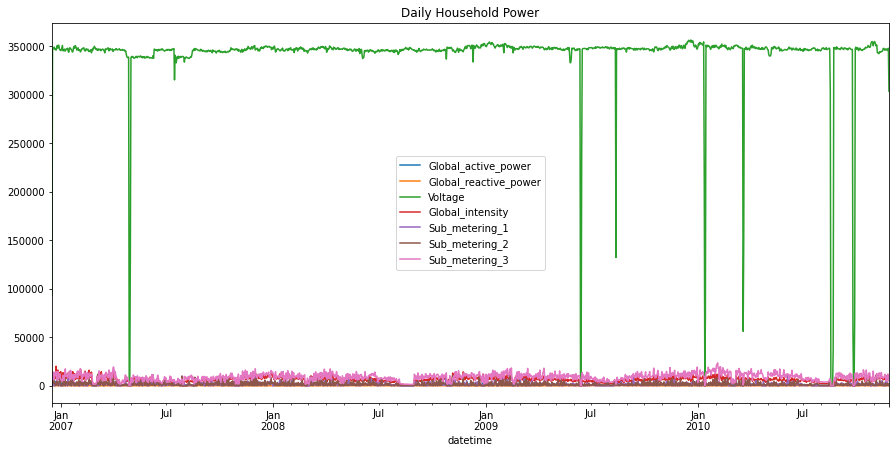

In [0]:
ax = daily_data.plot(title='Daily Household Power', figsize=(15,7))  #house hold power from 2007 to 2011


# data representation from 2010 to 2011

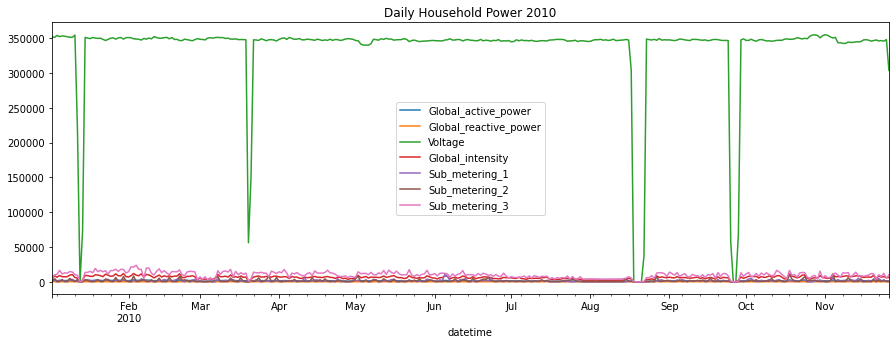

In [0]:
mask = (daily_data.index > '2010-01-01') & (daily_data.index < '2011-01-01')
ax = daily_data.loc[mask].plot(title='Daily Household Power 2010', figsize=(15,5))

# as we can see in above graphs voltage is too hight due to which other parameter get suppressed so we drop voltage to analys all parameters

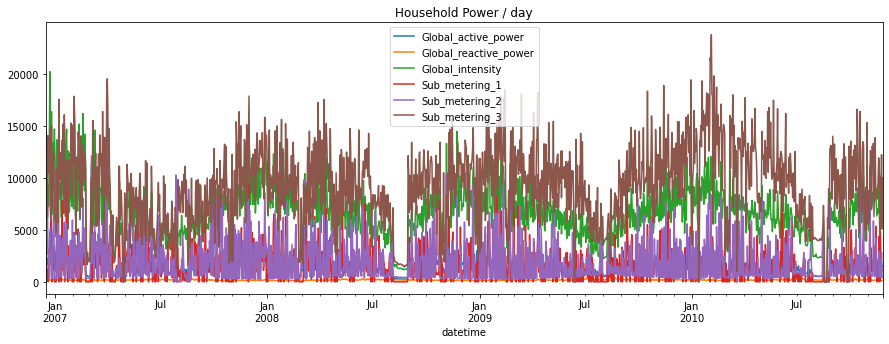

In [0]:
#daily data without voltage
ddata = daily_data.drop(columns=['Voltage'])
ax= ddata.plot(title='Household Power / day', figsize=(15,5))

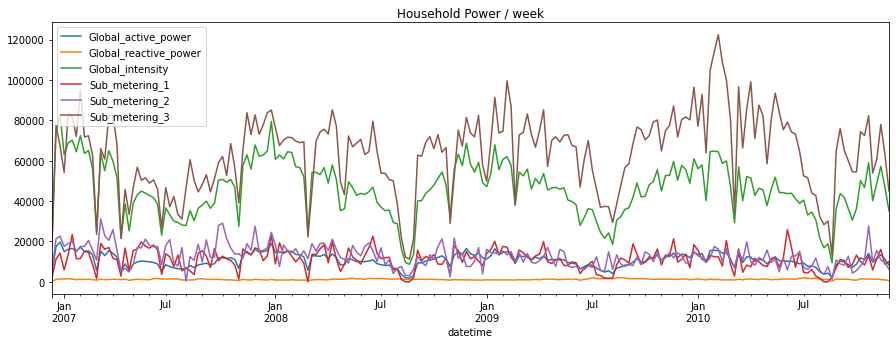

In [0]:
#weekly data without voltage
wkdata = weekly_data.drop(columns=['Voltage'])
ax= wkdata.plot(title='Household Power / week', figsize=(15,5))

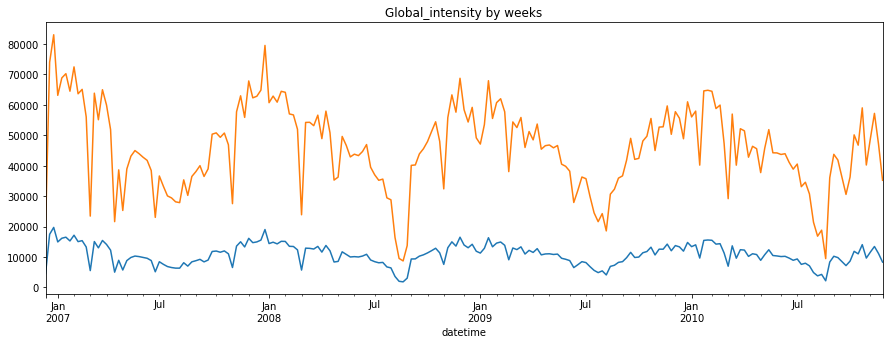

In [0]:
# active_power by week 
ax= weekly_data.Global_active_power.plot(title='Global_active_power by weeks', figsize=(15,5))
ax= weekly_data.Global_intensity.plot(title='Global_intensity by weeks', figsize=(15,5))

# Now to find relation between features we plot all featres vs all features

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


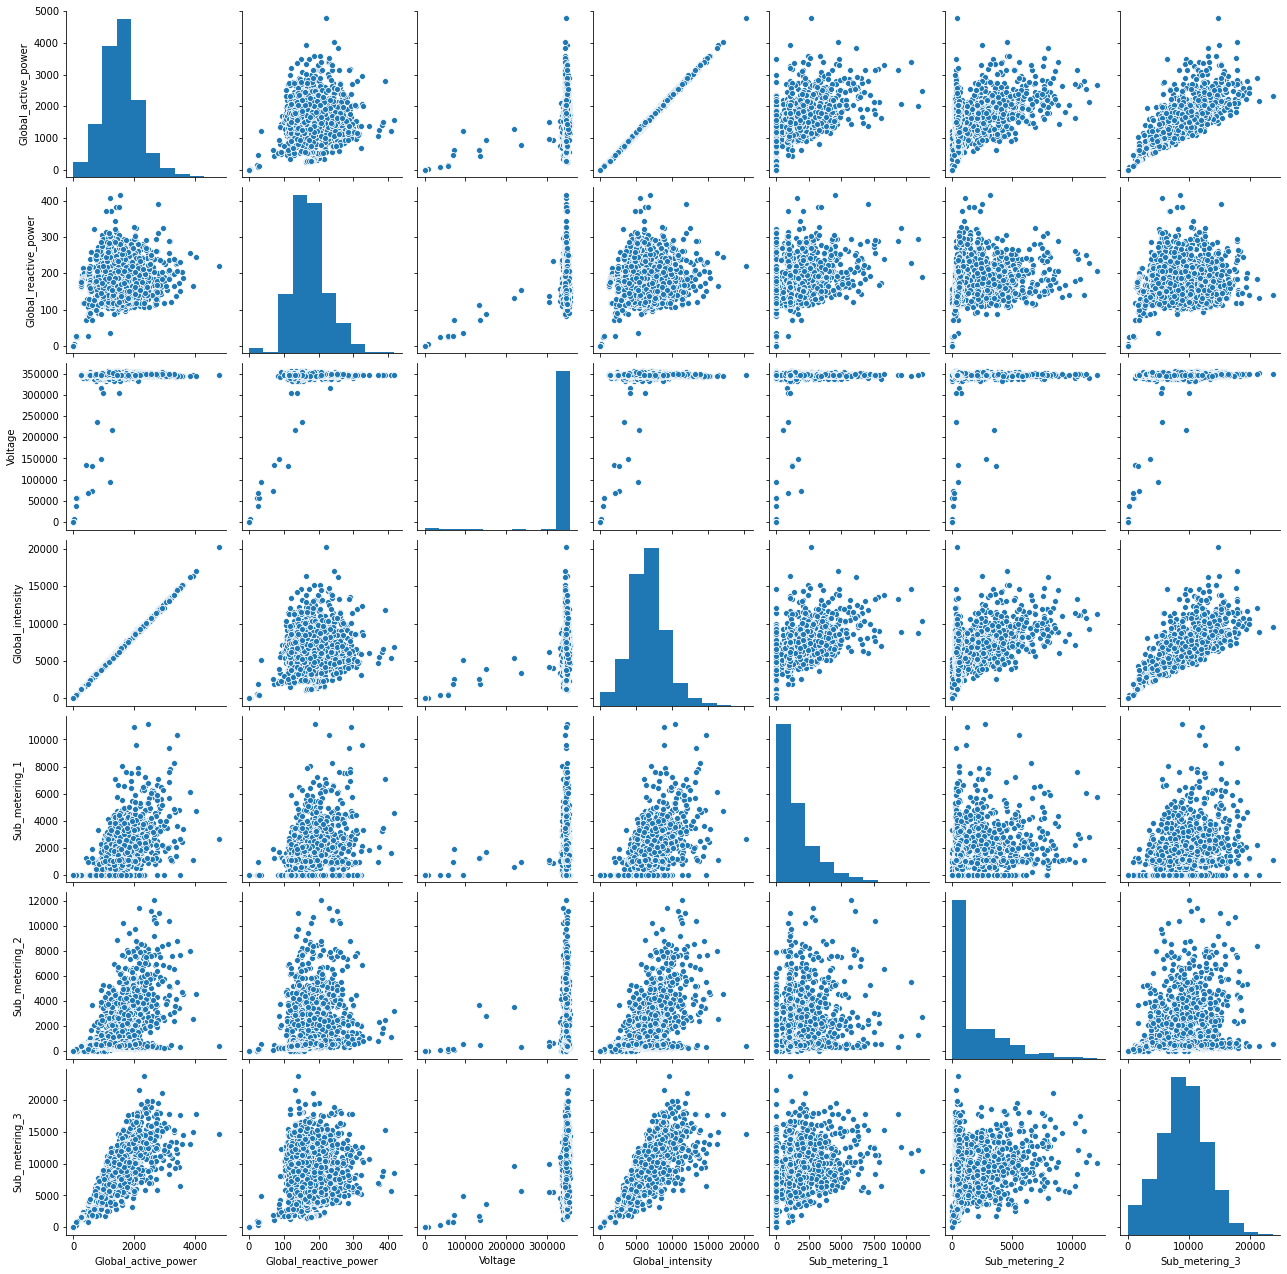

In [0]:
import seaborn as sns
ax = sns.pairplot(daily_data, height = 2.5)

# as we can see in above graphs Global_active_power  and  Global_intensity have linear reltion between them

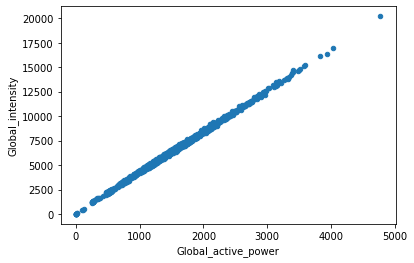

In [0]:
ax = daily_data.plot.scatter(x='Global_active_power', y='Global_intensity')

In [0]:
# due to resampling we deacrese the no. of sample or data for regression we need more data therefore we are resampling data by hour
hour_data = dataset.resample('h')
hour_data = hour_data.sum()
hour_data.shape

(34589, 7)

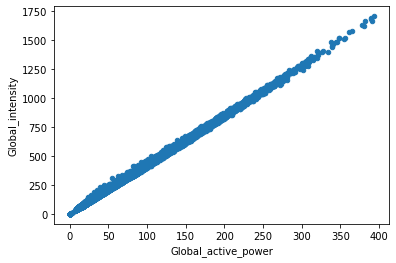

In [0]:
ax = hour_data.plot.scatter(x='Global_active_power', y='Global_intensity')

# for normalization of data we are using minmaxnormalization from SKlearn

In [0]:
# x = hour_data.values #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# data_for_train = pd.DataFrame(x_scaled)
# data_for_train
train_size = int(len(hour_data) * 0.9)
test_size = len(hour_data) - train_size
train, test = hour_data.iloc[0:train_size], hour_data.iloc[train_size:len(df)]
print(len(train), len(test))

31130 3459


In [0]:
f_columns = ['Global_intensity']
f_transformer = MinMaxScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/

In [0]:
Global_transformer = MinMaxScaler()
Global_transformer = Global_transformer.fit(train[['Global_active_power']])
train['Global_active_power'] = Global_transformer.transform(train[['Global_active_power']])
test['Global_active_power'] = Global_transformer.transform(test[['Global_active_power']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [0]:
time_steps = 24
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train.Global_intensity, train.Global_active_power, time_steps)
X_test, y_test = create_dataset(test.Global_intensity, test.Global_active_power, time_steps)
print(X_train.shape, y_train.shape)
# (15662, 10, 13) (15662,)

(31106, 24) (31106,)


In [0]:
X_train=X_train.reshape(-1,24,1)

# converting data into numpy array and proper dimesions 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D,LSTM

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# we are reducing learning rate here as modle is underfitting 

In [0]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [0]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Train on 27995 samples, validate on 3111 samples
Epoch 1/30
27995/27995 [==============================] - 118s 4ms/step - loss: 0.0117 - val_loss: 0.0064
Epoch 2/30
27995/27995 [==============================] - 113s 4ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 3/30
27995/27995 [==============================] - 113s 4ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 4/30
27995/27995 [==============================] - 113s 4ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 5/30
27995/27995 [==============================] - 112s 4ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 6/30
27995/27995 [==============================] - 112s 4ms/step - loss: 0.0085 - val_loss: 0.0062
Epoch 7/30
27995/27995 [==============================] - 112s 4ms/step - loss: 0.0084 - val_loss: 0.0061
Epoch 8/30
27995/27995 [==============================] - 111s 4ms/step - loss: 0.0084 - val_loss: 0.0061
Epoch 9/30
27995/27995 [==============================] - 112s 4ms/step - loss: 0.0084 - val_loss: 0.00

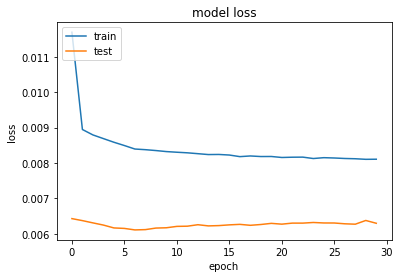

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# as we can see loss is converging 

In [0]:
y_pre = model.predict(X_test.reshape(-1,24,1))

In [0]:
y_train_inv = Global_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = Global_transformer.inverse_transform(y_test.reshape(1,-1))
pred_inv = Global_transformer.inverse_transform(y_pre)

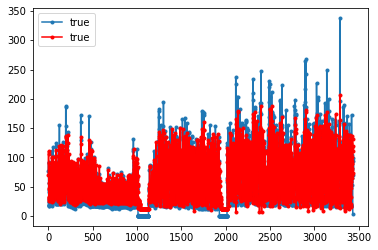

In [0]:
plt.plot(y_test_inv.flatten(),marker = '.',label = 'true')
plt.plot(pred_inv.flatten(),'r',marker = '.',label = 'true')
plt.legend();


In [0]:
final_predict =pd.DataFrame(pred_inv, index=test[:-24].index, columns=['predicts'])

In [0]:
y_test_inv.T


array([[76.428  ],
       [91.846  ],
       [44.372  ],
       ...,
       [99.55999],
       [69.822  ],
       [ 2.804  ]], dtype=float32)

In [0]:
final_predict =pd.DataFrame(pred_inv, index=test[:-24].index, columns=['predicts'])
#final_predict
final = pd.DataFrame(y_test_inv.T, index=test[:-24].index, columns=['real'])



In [0]:
final_test= final_predict.join(final)

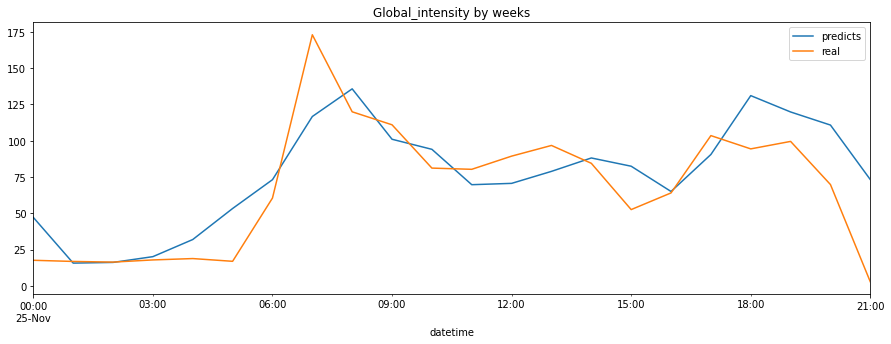

In [0]:
ax = final_test.loc['2010-11-25':'2010-11-25'].plot(title='Global_intensity by weeks', figsize=(15,5))

In [0]:
#as we can see it almost fit  